In [51]:
import os
import math
import itertools
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy.linalg import eigh, expm, eig
from scipy.sparse import identity, csr_matrix, kron, save_npz, load_npz
from k_local_hamiltonian import KLocalHamiltonian
# from random_matrix_analysis import calculate_level_statistics_definition_one as cls

# matplotlib parameters 
large = 40; med = 25; small = 20
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med ,
          'axes.titlesize': med ,
          'xtick.labelsize': med ,
          'ytick.labelsize': med ,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica Neue"
plt.rcParams["font.serif"] = ["Helvetica Neue"]          
# plt.rcParams['text.usetex'] = True # need LaTeX. Change it to False if LaTeX is not installed in the system
plt.rcParams.update(params)

# Loschmidt echo plateau as a function of system size

In [52]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

L_lst = [8, 9, 10, 11, 12, 13, 14]
k_lst = [2, 3]

sigma_lst = [1.0, 2.0, 3.0, 4.0, 5.0]
ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000))).astype(float)

# path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/a30_spectrum/"
# os.chdir(path)
# LE_L_k_arr = np.load("Loschmidt_echo_vs_time_L8_k3_sigma1.0_initial_plus_state.npy", allow_pickle=True).flatten()

In [53]:
def LE_steady_state(L, k, sigma, ts, seed_idx):
     # path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_3_10_disorders/"
     path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_2_3_disorders_10_ti=0+1.e-10_1.e20_1000/"
     os.chdir(path)     
     LE = np.load(f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma}_seed_{10000 + seed_idx}_initial_plus_state.npy", allow_pickle=True).flatten()
     # Fit to a constant value in the long-time limit using window 1.e5 < ts < 1.e8
     mask = (ts > 1.e6) & (ts < 1.e10)
     if np.any(mask):
         steady_state_value = np.mean(LE[mask])
     else:
         steady_state_value = LE[-1]
     return steady_state_value

# k = 3
sigma = 1.0
LE_8_sigma_1_mean = np.mean([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_1_std = np.std([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])/np.sqrt(9 - 1)
LE_9_sigma_1_mean = np.mean([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_1_std = np.std([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])/np.sqrt(9 - 1)
LE_10_sigma_1_mean = np.mean([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_1_std = np.std([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_1_mean = np.mean([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_1_std = np.std([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_1_mean = np.mean([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_1_std = np.std([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_1_mean = np.mean([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_1_std = np.std([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_1_mean = np.mean([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_1_std = np.std([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 2.0
LE_8_sigma_2_mean = np.mean([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_2_std = np.std([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_2_mean = np.mean([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_2_std = np.std([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_2_mean = np.mean([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_2_std = np.std([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_2_mean = np.mean([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_2_std = np.std([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_2_mean = np.mean([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_2_std = np.std([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_2_mean = np.mean([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_2_std = np.std([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_2_mean = np.mean([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_2_std = np.std([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 3.0
LE_8_sigma_3_mean = np.mean([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_3_std = np.std([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_3_mean = np.mean([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_3_std = np.std([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_3_mean = np.mean([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_3_std = np.std([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_3_mean = np.mean([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_3_std = np.std([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_3_mean = np.mean([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_3_std = np.std([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_3_mean = np.mean([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_3_std = np.std([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_3_mean = np.mean([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_3_std = np.std([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 4.0
LE_8_sigma_4_mean = np.mean([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_4_std = np.std([LE_steady_state(8, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_4_mean = np.mean([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_4_std = np.std([LE_steady_state(9, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_4_mean = np.mean([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_4_std = np.std([LE_steady_state(10, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_4_mean = np.mean([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_4_std = np.std([LE_steady_state(11, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_4_mean = np.mean([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_4_std = np.std([LE_steady_state(12, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_4_mean = np.mean([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_4_std = np.std([LE_steady_state(13, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_4_mean = np.mean([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_4_std = np.std([LE_steady_state(14, 3, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 5.0
LE_8_sigma_5_mean = np.mean([LE_steady_state(8, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_5_std = np.std([LE_steady_state(8, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_5_mean = np.mean([LE_steady_state(9, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_5_std = np.std([LE_steady_state(9, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_5_mean = np.mean([LE_steady_state(10, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_5_std = np.std([LE_steady_state(10, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_5_mean = np.mean([LE_steady_state(11, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_5_std = np.std([LE_steady_state(11, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_5_mean = np.mean([LE_steady_state(12, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_5_std = np.std([LE_steady_state(12, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_5_mean = np.mean([LE_steady_state(13, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_5_std = np.std([LE_steady_state(13, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_5_mean = np.mean([LE_steady_state(14, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_5_std = np.std([LE_steady_state(14, 3, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

L_values = np.array(L_lst)
LE_sigma_1_means = np.array([LE_8_sigma_1_mean, LE_9_sigma_1_mean, LE_10_sigma_1_mean, LE_11_sigma_1_mean, LE_12_sigma_1_mean, LE_13_sigma_1_mean, LE_14_sigma_1_mean])
LE_sigma_1_stds = np.array([LE_8_sigma_1_std, LE_9_sigma_1_std, LE_10_sigma_1_std, LE_11_sigma_1_std, LE_12_sigma_1_std, LE_13_sigma_1_std, LE_14_sigma_1_std])
LE_sigma_2_means = np.array([LE_8_sigma_2_mean, LE_9_sigma_2_mean, LE_10_sigma_2_mean, LE_11_sigma_2_mean, LE_12_sigma_2_mean, LE_13_sigma_2_mean, LE_14_sigma_2_mean])
LE_sigma_2_stds = np.array([LE_8_sigma_2_std, LE_9_sigma_2_std, LE_10_sigma_2_std, LE_11_sigma_2_std, LE_12_sigma_2_std, LE_13_sigma_2_std, LE_14_sigma_2_std])
LE_sigma_3_means = np.array([LE_8_sigma_3_mean, LE_9_sigma_3_mean, LE_10_sigma_3_mean, LE_11_sigma_3_mean, LE_12_sigma_3_mean, LE_13_sigma_3_mean, LE_14_sigma_3_mean])
LE_sigma_3_stds = np.array([LE_8_sigma_3_std, LE_9_sigma_3_std, LE_10_sigma_3_std, LE_11_sigma_3_std, LE_12_sigma_3_std, LE_13_sigma_3_std, LE_14_sigma_3_std])
LE_sigma_4_means = np.array([LE_8_sigma_4_mean, LE_9_sigma_4_mean, LE_10_sigma_4_mean, LE_11_sigma_4_mean, LE_12_sigma_4_mean, LE_13_sigma_4_mean, LE_14_sigma_4_mean])
LE_sigma_4_stds = np.array([LE_8_sigma_4_std, LE_9_sigma_4_std, LE_10_sigma_4_std, LE_11_sigma_4_std, LE_12_sigma_4_std, LE_13_sigma_4_std, LE_14_sigma_4_std])
LE_sigma_5_means = np.array([LE_8_sigma_5_mean, LE_9_sigma_5_mean, LE_10_sigma_5_mean, LE_11_sigma_5_mean, LE_12_sigma_5_mean, LE_13_sigma_5_mean, LE_14_sigma_5_mean])
LE_sigma_5_stds = np.array([LE_8_sigma_5_std, LE_9_sigma_5_std, LE_10_sigma_5_std, LE_11_sigma_5_std, LE_12_sigma_5_std, LE_13_sigma_5_std, LE_14_sigma_5_std])

# k = 2
sigma = 1.0
LE_8_sigma_1_mean_k2 = np.mean([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_1_std_k2 = np.std([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])/np.sqrt(9 - 1)
LE_9_sigma_1_mean_k2 = np.mean([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_1_std_k2 = np.std([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])/np.sqrt(9 - 1)
LE_10_sigma_1_mean_k2 = np.mean([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_1_std_k2 = np.std([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_1_mean_k2 = np.mean([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_1_std_k2 = np.std([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_1_mean_k2 = np.mean([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_1_std_k2 = np.std([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_1_mean_k2 = np.mean([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_1_std_k2 = np.std([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_1_mean_k2 = np.mean([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_1_std_k2 = np.std([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 2.0
LE_8_sigma_2_mean_k2 = np.mean([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_2_std_k2 = np.std([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_2_mean_k2 = np.mean([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_2_std_k2 = np.std([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_2_mean_k2 = np.mean([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_2_std_k2 = np.std([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_2_mean_k2 = np.mean([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_2_std_k2 = np.std([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_2_mean_k2 = np.mean([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_2_std_k2 = np.std([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_2_mean_k2 = np.mean([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_2_std_k2 = np.std([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_2_mean_k2 = np.mean([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_2_std_k2 = np.std([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 3.0
LE_8_sigma_3_mean_k2 = np.mean([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_3_std_k2 = np.std([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_3_mean_k2 = np.mean([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_3_std_k2 = np.std([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_3_mean_k2 = np.mean([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_3_std_k2 = np.std([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_3_mean_k2 = np.mean([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_3_std_k2 = np.std([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_3_mean_k2 = np.mean([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_3_std_k2 = np.std([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_3_mean_k2 = np.mean([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_3_std_k2 = np.std([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_3_mean_k2 = np.mean([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_3_std_k2 = np.std([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 4.0
LE_8_sigma_4_mean_k2 = np.mean([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_4_std_k2 = np.std([LE_steady_state(8, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_4_mean_k2 = np.mean([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_4_std_k2 = np.std([LE_steady_state(9, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_4_mean_k2 = np.mean([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_4_std_k2 = np.std([LE_steady_state(10, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_4_mean_k2 = np.mean([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_4_std_k2 = np.std([LE_steady_state(11, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_4_mean_k2 = np.mean([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_4_std_k2 = np.std([LE_steady_state(12, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_4_mean_k2 = np.mean([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_4_std_k2 = np.std([LE_steady_state(13, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_4_mean_k2 = np.mean([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_4_std_k2 = np.std([LE_steady_state(14, 2, sigma, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

sigma = 5.0
LE_8_sigma_5_mean_k2 = np.mean([LE_steady_state(8, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_8_sigma_5_std_k2 = np.std([LE_steady_state(8, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_9_sigma_5_mean_k2 = np.mean([LE_steady_state(9, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_9_sigma_5_std_k2 = np.std([LE_steady_state(9, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_10_sigma_5_mean_k2 = np.mean([LE_steady_state(10, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_10_sigma_5_std_k2 = np.std([LE_steady_state(10, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_11_sigma_5_mean_k2 = np.mean([LE_steady_state(11, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_11_sigma_5_std_k2 = np.std([LE_steady_state(11, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_12_sigma_5_mean_k2 = np.mean([LE_steady_state(12, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_12_sigma_5_std_k2 = np.std([LE_steady_state(12, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_13_sigma_5_mean_k2 = np.mean([LE_steady_state(13, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_13_sigma_5_std_k2 = np.std([LE_steady_state(13, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)
LE_14_sigma_5_mean_k2 = np.mean([LE_steady_state(14, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)])
LE_14_sigma_5_std_k2 = np.std([LE_steady_state(14, 2, 5.0, ts, seed_idx) for seed_idx in range(1,10)]) / np.sqrt(9 - 1)

L_values = np.array(L_lst)
LE_sigma_1_means_k2 = np.array([LE_8_sigma_1_mean_k2, LE_9_sigma_1_mean_k2, LE_10_sigma_1_mean_k2, LE_11_sigma_1_mean_k2, LE_12_sigma_1_mean_k2, LE_13_sigma_1_mean_k2, LE_14_sigma_1_mean_k2])
LE_sigma_1_stds_k2 = np.array([LE_8_sigma_1_std_k2, LE_9_sigma_1_std_k2, LE_10_sigma_1_std_k2, LE_11_sigma_1_std_k2, LE_12_sigma_1_std_k2, LE_13_sigma_1_std_k2, LE_14_sigma_1_std_k2])
LE_sigma_2_means_k2 = np.array([LE_8_sigma_2_mean_k2, LE_9_sigma_2_mean_k2, LE_10_sigma_2_mean_k2, LE_11_sigma_2_mean_k2, LE_12_sigma_2_mean_k2, LE_13_sigma_2_mean_k2, LE_14_sigma_2_mean_k2])
LE_sigma_2_stds_k2 = np.array([LE_8_sigma_2_std_k2, LE_9_sigma_2_std_k2, LE_10_sigma_2_std_k2, LE_11_sigma_2_std_k2, LE_12_sigma_2_std_k2, LE_13_sigma_2_std_k2, LE_14_sigma_2_std_k2])
LE_sigma_3_means_k2 = np.array([LE_8_sigma_3_mean_k2, LE_9_sigma_3_mean_k2, LE_10_sigma_3_mean_k2, LE_11_sigma_3_mean_k2, LE_12_sigma_3_mean_k2, LE_13_sigma_3_mean_k2, LE_14_sigma_3_mean_k2])
LE_sigma_3_stds_k2 = np.array([LE_8_sigma_3_std_k2, LE_9_sigma_3_std_k2, LE_10_sigma_3_std_k2, LE_11_sigma_3_std_k2, LE_12_sigma_3_std_k2, LE_13_sigma_3_std_k2, LE_14_sigma_3_std_k2])
LE_sigma_4_means_k2 = np.array([LE_8_sigma_4_mean_k2, LE_9_sigma_4_mean_k2, LE_10_sigma_4_mean_k2, LE_11_sigma_4_mean_k2, LE_12_sigma_4_mean_k2, LE_13_sigma_4_mean_k2, LE_14_sigma_4_mean_k2])
LE_sigma_4_stds_k2 = np.array([LE_8_sigma_4_std_k2, LE_9_sigma_4_std_k2, LE_10_sigma_4_std_k2, LE_11_sigma_4_std_k2, LE_12_sigma_4_std_k2, LE_13_sigma_4_std_k2, LE_14_sigma_4_std_k2])
LE_sigma_5_means_k2 = np.array([LE_8_sigma_5_mean_k2, LE_9_sigma_5_mean_k2, LE_10_sigma_5_mean_k2, LE_11_sigma_5_mean_k2, LE_12_sigma_5_mean_k2, LE_13_sigma_5_mean_k2, LE_14_sigma_5_mean_k2])
LE_sigma_5_stds_k2 = np.array([LE_8_sigma_5_std_k2, LE_9_sigma_5_std_k2, LE_10_sigma_5_std_k2, LE_11_sigma_5_std_k2, LE_12_sigma_5_std_k2, LE_13_sigma_5_std_k2, LE_14_sigma_5_std_k2])

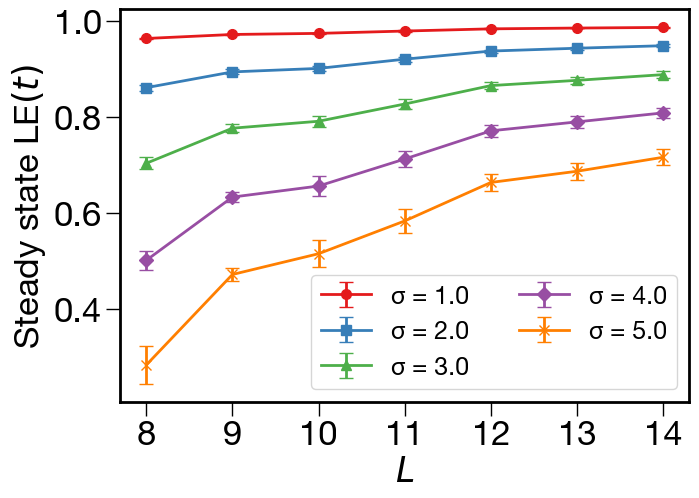

In [54]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(7, 5))

# Choose color from tab10 colormap
colors = plt.cm.Set1(np.linspace(0, 1, 10))

L_values = [8, 9, 10, 11, 12, 13, 14]

ax.errorbar(L_values, LE_sigma_1_means, yerr=LE_sigma_1_stds, fmt='o-', label=r'σ = 1.0', ms = 7, capsize=5, lw = 2, color = colors[0])
ax.errorbar(L_values, LE_sigma_2_means, yerr=LE_sigma_2_stds, fmt='s-', label=r'σ = 2.0', ms = 7, capsize=5, lw = 2, color = colors[1])
ax.errorbar(L_values, LE_sigma_3_means, yerr=LE_sigma_3_stds, fmt='^-', label=r'σ = 3.0', ms = 7, capsize=5, lw = 2, color = colors[2])
ax.errorbar(L_values, LE_sigma_4_means, yerr=LE_sigma_4_stds, fmt='D-', label=r'σ = 4.0', ms = 7, capsize=5, lw = 2, color = colors[3])
ax.errorbar(L_values, LE_sigma_5_means, yerr=LE_sigma_5_stds, fmt='x-', label=r'σ = 5.0', ms = 7, capsize=5, lw = 2, color = colors[4])

# plt.axhline(y=1, color='gray', linestyle='--', lw = 1)
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'Steady state LE$(t)$')
ax.legend(fontsize=18, ncol = 2)
plt.tight_layout()
# Custom xtick labels
ax.set_xticks(L_values)
ax.set_xticklabels([str(L) for L in L_values])
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=1, length=10, direction='out', which='major')
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
os.chdir(path)
plt.savefig(f"Loschmidt_echo_steady_state_vs_L_k3_avg_spectrum.png", bbox_inches='tight', dpi=300)
plt.show()

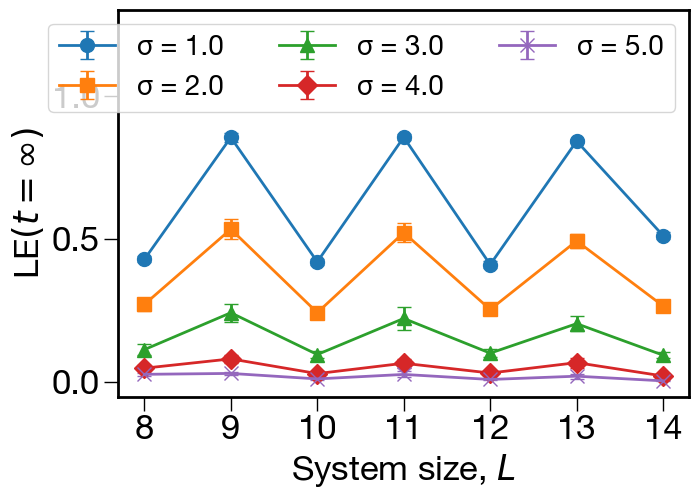

In [55]:
fig, ax = plt.subplots(figsize=(7, 5))

# Choose color from tab10 colormap
colors = plt.cm.tab10(np.linspace(0, 1, 10))

markersize = 10
ax.errorbar(L_values, LE_sigma_1_means_k2, yerr=LE_sigma_1_stds_k2, fmt='o-', label=r'σ = 1.0', ms = markersize, capsize=5, lw = 2, color = colors[0])
ax.errorbar(L_values, LE_sigma_2_means_k2, yerr=LE_sigma_2_stds_k2, fmt='s-', label=r'σ = 2.0', ms = markersize, capsize=5, lw = 2, color = colors[1])
ax.errorbar(L_values, LE_sigma_3_means_k2, yerr=LE_sigma_3_stds_k2, fmt='^-', label=r'σ = 3.0', ms = markersize, capsize=5, lw = 2, color = colors[2])
ax.errorbar(L_values, LE_sigma_4_means_k2, yerr=LE_sigma_4_stds_k2, fmt='D-', label=r'σ = 4.0', ms = markersize, capsize=5, lw = 2, color = colors[3])
ax.errorbar(L_values, LE_sigma_5_means_k2, yerr=LE_sigma_5_stds_k2, fmt='x-', label=r'σ = 5.0', ms = markersize, capsize=5, lw = 2, color = colors[4])

# plt.axhline(y=1, color='gray', linestyle='--', lw = 1)
ax.set_xlabel(r'System size, $L$')
ax.set_ylabel(r'LE$(t= \infty)$')
ax.legend(fontsize=20, ncol = 3)
plt.tight_layout()
# Custom xtick labels
ax.set_xticks(L_values)
ax.set_xticklabels([str(L) for L in L_values])
ax.set_ylim(-0.05, 1.3)
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=1, length=10, direction='out', which='major')
# path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
# os.chdir(path)
# plt.savefig(f"Loschmidt_echo_steady_stat_vs_L_k3_avg_spectrum.png", bbox_inches='tight', dpi=300)
plt.show()

## Single realization Loschmidt echo plot for different $\sigma$

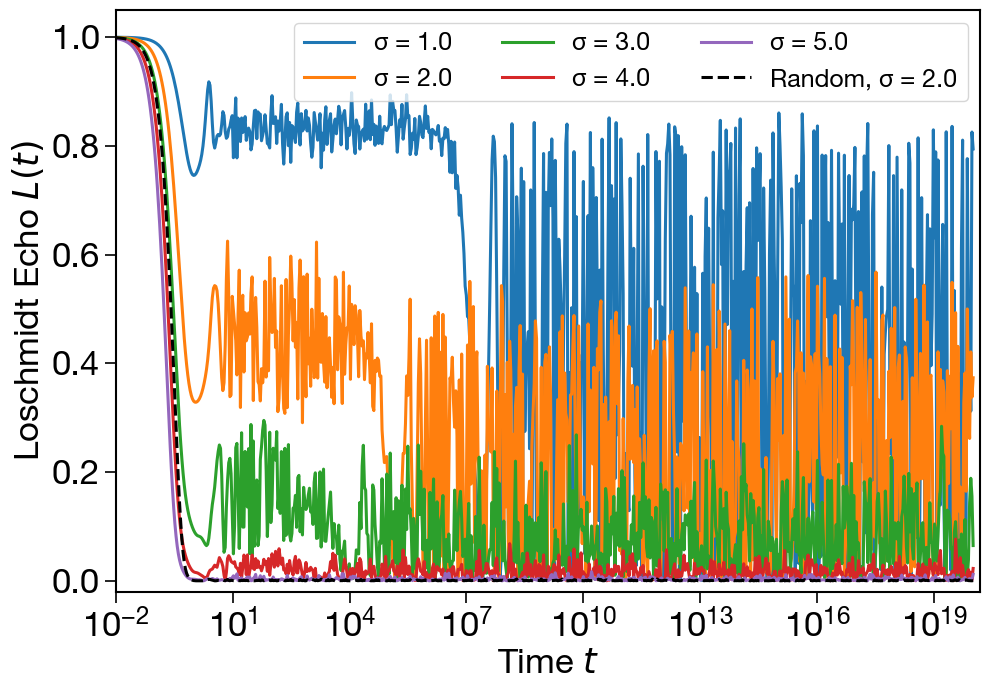

In [56]:
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_2_3_disorders_10_ti=0+1.e-10_1.e20_1000/"
os.chdir(path)

L = 14
k = 2
seed = 10001
sigma_values = [1.0, 2.0, 3.0, 4.0, 5.0]

# Create time points with logarithmic spacing
ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000)))

fig, ax = plt.subplots(figsize=(10, 7))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot Loschmidt echo for each sigma value
for i, sigma in enumerate(sigma_values):
     fname = f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma:.1f}_seed_{seed}_initial_plus_state.npy"
     LE = np.load(fname, allow_pickle=True).flatten().astype(float)

     
     ax.plot(ts, LE, lw=2.2, color=colors[i], label=f"σ = {sigma:.1f}")

# Plot random initial state for comparison
sigma_rand = 2.0
fname_rand = f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma_rand:.1f}_seed_{seed}_initial_random_state.npy"
LE_rand = np.load(fname_rand, allow_pickle=True).flatten().astype(float)
ax.plot(ts, LE_rand, lw=2.2, color='k', linestyle='--', label=f"Random, σ = {sigma_rand:.1f}")

# Configure plot
ax.set_xscale('log')
ax.set_xlabel('Time $t$')
ax.set_ylabel('Loschmidt Echo $L(t)$')
ax.set_xlim(1e-2, 1e20*1.5)
ax.set_ylim(-0.02, 1.05)
ax.legend(fontsize=18, ncol=3, loc='best')

# Style settings
for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.2, length=8, direction='out', which='major')

plt.tight_layout()
plt.show()

## Mean Loschmidt echo plot for different $\sigma$

In [57]:
# Calculate the mean Loschmidt echo in the steady state for L=14, k=2 and all sigma values.
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_2_3_disorders_10_ti=0+1.e-10_1.e20_1000/"
os.chdir(path)    
L = 14
k = 2
seed_indices = range(1, 10)

LE_14_k2_mean = []    # steady-state mean (one value per sigma)
LE_14_k2_errors = []  # error on steady-state mean (one value per sigma)

LE_L_14_k_2_vs_time_mean_list = []  # store full time-series means per sigma
LE_L_14_k_2_vs_time_std_list = []   # store full time-series std-errors per sigma

for sigma in sigma_lst:
     # load all seeds and stack
     files_k2 = [np.load(f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma}_seed_{10000+si}_initial_plus_state.npy", allow_pickle=True).flatten()
                    for si in seed_indices]
     stacked_k2 = np.vstack([np.asarray(f, dtype=float) for f in files_k2])   # shape (n_seeds, T)
     n_seeds_k2 = stacked_k2.shape[0]

     # mean time-series across seeds and standard error (std/sqrt(n))
     mean_ts_k2 = np.mean(stacked_k2, axis=0)
     std_err_ts_k2 = np.std(stacked_k2, axis=0, ddof=0) / np.sqrt(n_seeds_k2)

     # save the time-series results (will also keep the last sigma in the variables below)
     LE_L_14_k_2_vs_time_mean = mean_ts_k2
     LE_L_14_k_2_vs_time_std = std_err_ts_k2

     LE_L_14_k_2_vs_time_mean_list.append(mean_ts_k2)
     LE_L_14_k_2_vs_time_std_list.append(std_err_ts_k2)

     # steady-state estimate: average mean_ts over long times (ts > 1e15)
     mask = ts > 1e15
     steady_seed_vals = stacked_k2[:, mask].mean(axis=1)   # one steady value per seed
     steady_mean = steady_seed_vals.mean()
     steady_err = steady_seed_vals.std(ddof=0) / np.sqrt(n_seeds_k2)

     LE_14_k2_mean.append(np.float64(steady_mean))
     LE_14_k2_errors.append(np.float64(steady_err))

L = 14
k = 3

LE_14_k3_mean = []    # steady-state mean (one value per sigma)
LE_14_k3_errors = []  # error on steady-state mean (one value per sigma)

LE_L_14_k_3_vs_time_mean_list = []  # store full time-series means per sigma
LE_L_14_k_3_vs_time_std_list = []   # store full time-series std-errors per sigma

for sigma in sigma_lst:
     # load all seeds and stack
     files_k3 = [np.load(f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma}_seed_{10000+si}_initial_plus_state.npy", allow_pickle=True).flatten()
                    for si in seed_indices]
     stacked_k3 = np.vstack([np.asarray(f, dtype=float) for f in files_k3])   # shape (n_seeds, T)
     n_seeds_k3 = stacked_k3.shape[0]

     # mean time-series across seeds and standard error (std/sqrt(n))
     mean_ts_k3 = np.mean(stacked_k3, axis=0)
     std_err_ts_k3 = np.std(stacked_k3, axis=0, ddof=0) / np.sqrt(n_seeds_k3)

     # save the time-series results (will also keep the last sigma in the variables below)
     LE_L_14_k_3_vs_time_mean = mean_ts_k3
     LE_L_14_k_3_vs_time_std = std_err_ts_k3

     LE_L_14_k_3_vs_time_mean_list.append(mean_ts_k3)
     LE_L_14_k_3_vs_time_std_list.append(std_err_ts_k3)

     # steady-state estimate: average mean_ts over long times (ts > 1e15)
     mask = ts > 1e15
     steady_seed_vals = stacked_k3[:, mask].mean(axis=1)   # one steady value per seed
     steady_mean = steady_seed_vals.mean()
     steady_err = steady_seed_vals.std(ddof=0) / np.sqrt(n_seeds_k3)

     LE_14_k3_mean.append(np.float64(steady_mean))
     LE_14_k3_errors.append(np.float64(steady_err))

### $L=14, k=3$

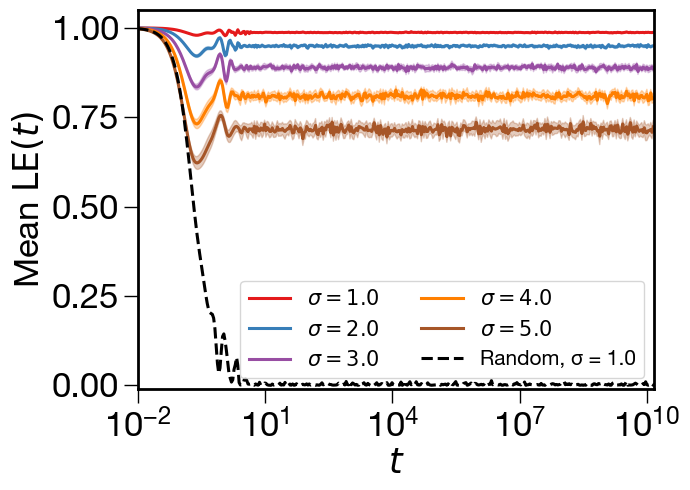

In [58]:
# Plot the mean Loschmidt echo vs time with error bars
# Ensure sigma ordering, colors and labels are consistent
L = 14
k = 3
fig, ax = plt.subplots(figsize=(7, 5))
# Use as many colors as there are sigmas
colors = plt.cm.Set1(np.linspace(0, 1, 7))
ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000)))

# Plot each sigma in the original order of sigma_lst
for i, sigma in enumerate(sigma_lst):
    mean_ts = LE_L_14_k_3_vs_time_mean_list[i]
    std_ts = LE_L_14_k_3_vs_time_std_list[i]
    ax.plot(ts, mean_ts, lw=2.2, color=colors[i], label=rf"$\sigma = {sigma:.1f}$")
    ax.fill_between(ts, mean_ts - std_ts, mean_ts + std_ts, color=colors[i], alpha=0.3)

# Plot random initial state for comparison
# Plot random initial state for comparison
sigma_rand = 1.0
fname_rand = f"Loschmidt_echo_vs_time_L{L}_k{k}_sigma{sigma_rand:.1f}_seed_{seed}_initial_random_state.npy"
LE_rand = np.load(fname_rand, allow_pickle=True).flatten().astype(float)
ax.plot(ts, LE_rand, lw=2.2, color='k', linestyle='--', label=f"Random, σ = {sigma_rand:.1f}")

ax.set_xscale('log')
ax.set_xlim(1e-2, 1e10*1.5)
ax.set_xlabel('$t$')
ax.set_ylabel(r'Mean $\mathrm{LE}(t)$')
ax.set_ylim(-0.01, 1.05)
ax.legend(fontsize=15, ncol=2, loc='best')
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=1, length=10, direction='out', which='major')
plt.tight_layout()
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
os.chdir(path)
plt.savefig(f"Mean_Loschmidt_echo_vs_time_L{L}_k{k}_avg_spectrum_10_disorders.png", bbox_inches='tight', dpi=300)
plt.show()

## $L=14, k = 2$

In [9]:
# # Plot the mean Loschmidt echo vs time with error bars
# # k = 2
# fig, ax = plt.subplots(figsize=(9, 5))
# colors = plt.cm.tab10(np.linspace(0, 1, 10))
# ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000)))
# markersize = 8

# # sigma = 1.0
# ax.plot(ts, LE_L_14_k_2_vs_time_mean_list[0], lw=2.2, color=colors[4], label=r"$\sigma = 1.0$")
# ax.fill_between(ts, LE_L_14_k_2_vs_time_mean_list[0] - LE_L_14_k_3_vs_time_std_list[0], 
#                 LE_L_14_k_2_vs_time_mean_list[0] + LE_L_14_k_3_vs_time_std_list[0], color=colors[4], alpha=0.3)

# # sigma = 2.0
# ax.plot(ts, LE_L_14_k_2_vs_time_mean_list[2], lw=2.2, color=colors[0], label=r"$\sigma = 2.0$")
# ax.fill_between(ts, LE_L_14_k_2_vs_time_mean_list[2] - LE_L_14_k_2_vs_time_std_list[2], 
#                 LE_L_14_k_2_vs_time_mean_list[2] + LE_L_14_k_2_vs_time_std_list[2], color=colors[0], alpha=0.3)

# # sigma = 3.0
# ax.plot(ts, LE_L_14_k_2_vs_time_mean_list[3], lw=2.2, color=colors[1], label=r"$\sigma = 3.0$")
# ax.fill_between(ts, LE_L_14_k_2_vs_time_mean_list[3] - LE_L_14_k_2_vs_time_std_list[3], 
#                 LE_L_14_k_2_vs_time_mean_list[3] + LE_L_14_k_2_vs_time_std_list[3], color=colors[1], alpha=0.3)

# # sigma = 4.0
# ax.plot(ts, LE_L_14_k_2_vs_time_mean_list[4], lw=2.2, color=colors[2], label=r"$\sigma = 4.0$")
# ax.fill_between(ts, LE_L_14_k_2_vs_time_mean_list[4] - LE_L_14_k_2_vs_time_std_list[4], 
#                 LE_L_14_k_2_vs_time_mean_list[4] + LE_L_14_k_2_vs_time_std_list[4], color=colors[2], alpha=0.3)

# # sigma = 5.0
# ax.plot(ts, LE_L_14_k_2_vs_time_mean_list[1], lw=2.2, color=colors[3], label=r"$\sigma = 5.0$")
# ax.fill_between(ts, LE_L_14_k_2_vs_time_mean_list[1] - LE_L_14_k_2_vs_time_std_list[1], 
#                 LE_L_14_k_2_vs_time_mean_list[1] + LE_L_14_k_2_vs_time_std_list[1], color=colors[3], alpha=0.3)
# ax.set_xlim(1e-2, 1e20*1.5)
# ax.set_xscale('log')
# ax.set_xlabel('Time $t$')
# ax.set_ylabel(r'$\langle L(t) \rangle$')
# ax.set_ylim(0.0, 1.05)
# plt.legend(fontsize=20, ncol=1, loc='best')
# for spine in ax.spines.values():
#      spine.set_linewidth(2)
# ax.tick_params(width=1, length=10, direction='out', which='major')
# plt.tight_layout()
# # path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
# # os.chdir(path)
# # plt.savefig(f"Loschmidt_echo_vs_time_L{L}_k{2}_avg_spectrum_10_disorders.png", bbox_inches='tight', dpi=300)
# plt.show()

# Loschmidt echo plot for different $L$ and $k=2$ for different $\sigma$

#### Odd $L$

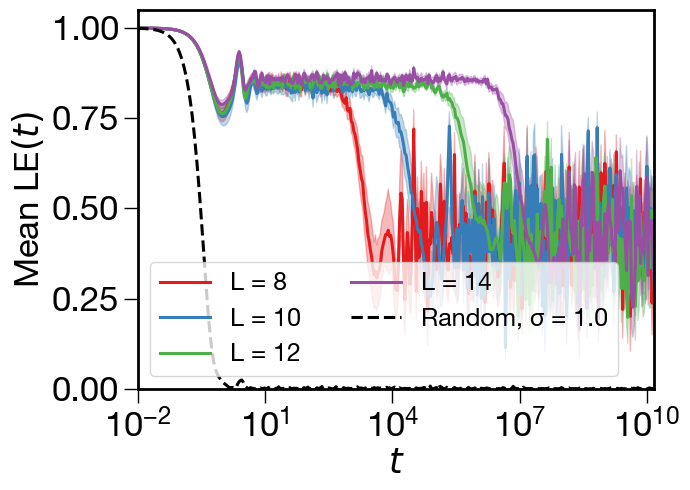

In [59]:
# Initialize arrays to store means and standard errors for each L and sigma
L_lst = [8, 10, 12, 14] # system sizes
sigma_lst = [1.0, 2.0, 3.0, 4.0, 5.0]  # disorder strengths
ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000)))  # time points

out_means = np.zeros((len(L_lst), len(sigma_lst), len(ts)))  # shape (nL, nσ, T)
out_stderr = np.zeros((len(L_lst), len(sigma_lst), len(ts)))  # shape (nL, nσ, T)

# Loop over system sizes and disorder strengths
for i, L in enumerate(L_lst):
     for j, sigma in enumerate(sigma_lst):
          # Load and stack data from all seeds
          path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_2_3_disorders_10_ti=0+1.e-10_1.e20_1000/"
          os.chdir(path)             
          files = [np.load(f"Loschmidt_echo_vs_time_L{L}_k{2}_sigma{sigma}_seed_{10000+si}_initial_plus_state.npy", allow_pickle=True).flatten()
                    for si in range(1,10)]
          stacked = np.vstack([np.asarray(f, dtype=float) for f in files])
          
          # Calculate mean and standard error across seeds
          out_means[i,j,:] = np.mean(stacked, axis=0)
          out_stderr[i,j,:] = np.std(stacked, axis=0, ddof=0) / np.sqrt(len(files))


# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

colors = plt.cm.Set1(np.linspace(0, 1, 8))
sigma_idx = 0

# Plot data for each system size
for j, L in enumerate(L_lst):
     ax.plot(ts, out_means[j,sigma_idx,:], 
               label=f'L = {L}', 
               color=colors[j], 
               lw=2.2)
     ax.fill_between(ts, 
                     out_means[j,sigma_idx,:] - out_stderr[j,sigma_idx,:], 
                     out_means[j,sigma_idx,:] + out_stderr[j,sigma_idx,:], 
                     color=colors[j], alpha=0.3)    

# Plot random initial state for comparison
sigma_rand = 1.0
L_rand = 14
seed = 10001
fname_rand = f"Loschmidt_echo_vs_time_L{L_rand}_k{2}_sigma{sigma_rand:.1f}_seed_{seed}_initial_random_state.npy"
LE_rand = np.load(fname_rand, allow_pickle=True).flatten().astype(float)
ax.plot(ts, LE_rand, lw=2.2, color='k', linestyle='--', label=f"Random, σ = {sigma_rand:.1f}")

ax.set_xscale('log')
ax.set_xlim(1e-2, 1e10*1.5)
ax.set_ylim(0, 1.05)
ax.legend(fontsize=18, ncol=2)
ax.set_xlabel('$t$')
ax.set_ylabel(r'Mean LE$(t)$')

for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=1, length=10, direction='out', which='major')

plt.tight_layout()
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
os.chdir(path)
plt.savefig(f"Mean_even_L_Loschmidt_echo_vs_time_k2_sigma{sigma_lst[sigma_idx]}.png", bbox_inches='tight', dpi=300)
plt.show()

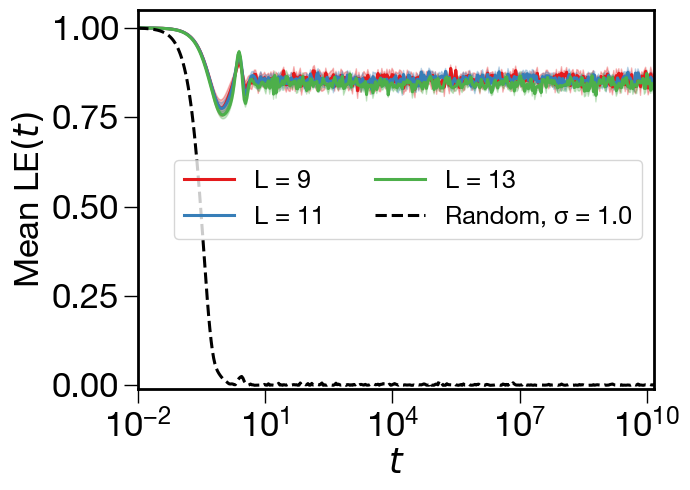

In [48]:
# Initialize arrays to store means and standard errors for each L and sigma
L_lst = [9, 11, 13]  # system sizes
sigma_lst = [1.0, 2.0, 3.0, 4.0, 5.0]  # disorder strengths
ts = np.concatenate(([0.0], np.logspace(-10, 20, 1000)))  # time points

out_means = np.zeros((len(L_lst), len(sigma_lst), len(ts)))  # shape (nL, nσ, T)
out_stderr = np.zeros((len(L_lst), len(sigma_lst), len(ts)))  # shape (nL, nσ, T)

# Loop over system sizes and disorder strengths
for i, L in enumerate(L_lst):
     for j, sigma in enumerate(sigma_lst):
          # Load and stack data from all seeds
          path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/LE_L_8_9_10_11_12_13_14_k_2_3_disorders_10_ti=0+1.e-10_1.e20_1000/"
          os.chdir(path)          
          files = [np.load(f"Loschmidt_echo_vs_time_L{L}_k{2}_sigma{sigma}_seed_{10000+si}_initial_plus_state.npy", allow_pickle=True).flatten()
                    for si in range(1,10)]
          stacked = np.vstack([np.asarray(f, dtype=float) for f in files])
          
          # Calculate mean and standard error across seeds
          out_means[i,j,:] = np.mean(stacked, axis=0)
          out_stderr[i,j,:] = np.std(stacked, axis=0, ddof=0) / np.sqrt(len(files))


# Create figure
fig, ax = plt.subplots(figsize=(7, 5))

colors = plt.cm.Set1(np.linspace(0, 1, 8))
sigma_idx = 0

# Plot data for each system size
for j, L in enumerate(L_lst):
     ax.plot(ts, out_means[j,sigma_idx,:], 
               label=f'L = {L}', 
               color=colors[j], 
               lw=2.2)
     ax.fill_between(ts, 
                     out_means[j,sigma_idx,:] - out_stderr[j,sigma_idx,:], 
                     out_means[j,sigma_idx,:] + out_stderr[j,sigma_idx,:], 
                     color=colors[j], alpha=0.3)

# Plot random initial state for comparison
sigma_rand = 1.0
L_rand = 14
seed = 10001
fname_rand = f"Loschmidt_echo_vs_time_L{L_rand}_k{2}_sigma{sigma_rand:.1f}_seed_{seed}_initial_random_state.npy"
LE_rand = np.load(fname_rand, allow_pickle=True).flatten().astype(float)
ax.plot(ts, LE_rand, lw=2.2, color='k', linestyle='--', label=f"Random, σ = {sigma_rand:.1f}")                      

ax.set_xscale('log')
ax.set_xlim(1e-2, 1e10*1.5)
ax.set_ylim(-0.01, 1.05)
ax.legend(fontsize=18, ncol=2)
ax.set_xlabel('$t$')
ax.set_ylabel(r'Mean LE$(t)$')

for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=1, length=10, direction='out', which='major')

plt.tight_layout()
path = "/Users/sasankadowarah/python_test_codes/k-local_hamiltonian/figures/"
os.chdir(path)
plt.savefig(f"Mean_odd_L_Loschmidt_echo_vs_time_k3_sigma{sigma_lst[sigma_idx]}.png", bbox_inches='tight', dpi=300)
plt.show()